In [ ]:
import numpy as np # calculator library
import pandas as pd # dataframe library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library based on matplotlib
from collections import Counter
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Brain_Tumor/BrainTumor.csv")

In [ ]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
df.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155
3761,Image3762,0,6.110138,480.884025,21.929068,0.118171,4.110669,17.538826,239.251388,0.306224,0.093773,0.494333,6.787329,0.938731,7.458341e-155


In [ ]:
df.isnull().sum

<bound method DataFrame.sum of       Image  Class   Mean  ...  Dissimilarity  Correlation  Coarseness
0     False  False  False  ...          False        False       False
1     False  False  False  ...          False        False       False
2     False  False  False  ...          False        False       False
3     False  False  False  ...          False        False       False
4     False  False  False  ...          False        False       False
...     ...    ...    ...  ...            ...          ...         ...
3757  False  False  False  ...          False        False       False
3758  False  False  False  ...          False        False       False
3759  False  False  False  ...          False        False       False
3760  False  False  False  ...          False        False       False
3761  False  False  False  ...          False        False       False

[3762 rows x 15 columns]>

In [ ]:
n = df.isnull().sum()
n

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

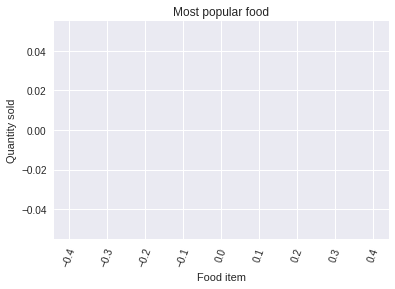

In [ ]:
plt.bar(n[0],n[1])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 
plt.show()


In [ ]:
df.isnull().sum().any

<bound method Series.any of Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64>

In [ ]:
df.shape

(3762, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


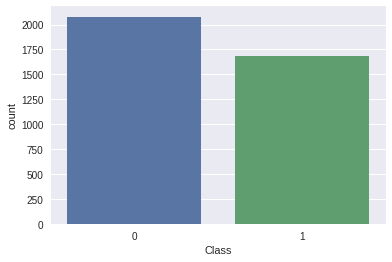

In [ ]:
sns.countplot(df["Class"])

In [ ]:
class_counts=df.Class.value_counts()
class_counts

0    2079
1    1683
Name: Class, dtype: int64

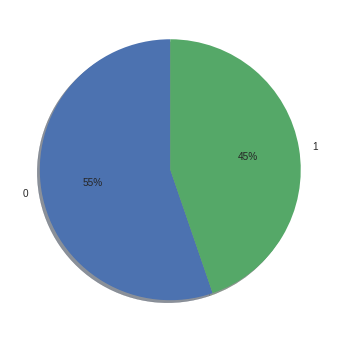

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%0.f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
df["Class"].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

In [ ]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [ ]:
x = df.drop(["Image"],1)
# y = df["Class"]

In [ ]:
x

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


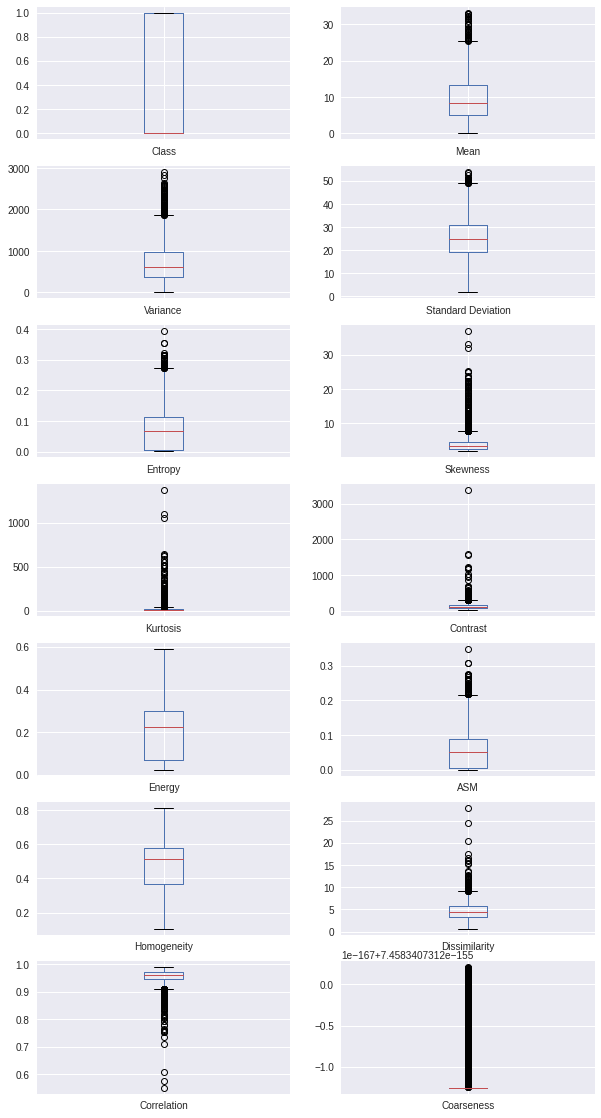

In [ ]:
x.plot(kind="box",subplots=True,layout=(7,2),figsize=(10,20));

In [ ]:
correlations = x.corr()

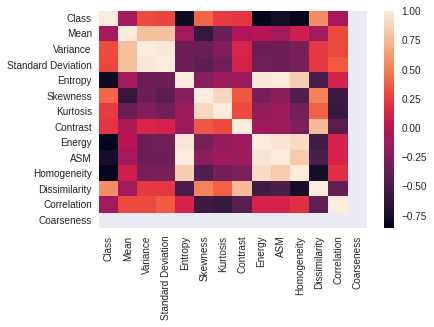

In [ ]:
sns.heatmap(correlations)
plt.show()

**Outlier detection**

In [ ]:
def detect_outliers(df, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [ ]:
x.loc[detect_outliers(x,["Class","Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"])]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
69,0,32.974335,2630.774546,51.291077,0.058575,1.990064,4.263510,386.946380,0.211036,0.044536,0.500845,6.379274,0.944384,7.458341e-155
686,0,32.832153,2598.678936,50.977239,0.058397,1.986680,4.252588,352.123803,0.210743,0.044413,0.484549,6.569327,0.948522,7.458341e-155
687,0,30.854248,2470.834261,49.707487,0.055421,2.061911,4.543874,390.810324,0.204924,0.041994,0.492595,6.407239,0.939324,7.458341e-155
897,1,27.777878,2514.006331,50.139868,0.027225,2.278691,5.446137,178.210179,0.141348,0.019979,0.495875,4.166667,0.965503,7.458341e-155
1115,0,32.206467,2604.354097,51.032873,0.056008,2.019719,4.381090,423.663642,0.206095,0.042475,0.502325,6.503498,0.939392,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1,3.244949,373.645816,19.329920,0.007513,6.608718,45.579790,502.839177,0.073153,0.005351,0.330291,9.558205,0.892741,7.458341e-155
2427,1,7.558182,920.975312,30.347575,0.001708,4.521819,21.463864,361.850250,0.034499,0.001190,0.265279,9.771750,0.895138,7.458341e-155
3237,1,7.219604,900.344489,30.005741,0.010625,4.480255,20.410193,376.339211,0.087184,0.007601,0.382338,6.041842,0.901592,7.458341e-155
3359,1,8.734390,1022.432511,31.975499,0.001776,4.232220,18.921784,319.973663,0.035230,0.001241,0.252318,9.486008,0.920333,7.458341e-155


In [ ]:
# drop Outliers
x = x.drop(detect_outliers(x,["Class","Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"]),axis=0).reset_index(drop=True)



In [ ]:
x

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3590,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3591,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3592,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [ ]:
correl = x.corr()

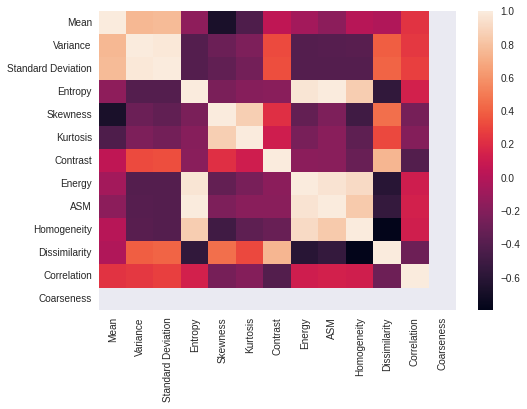

In [ ]:
sns.heatmap(correl)
plt.show()

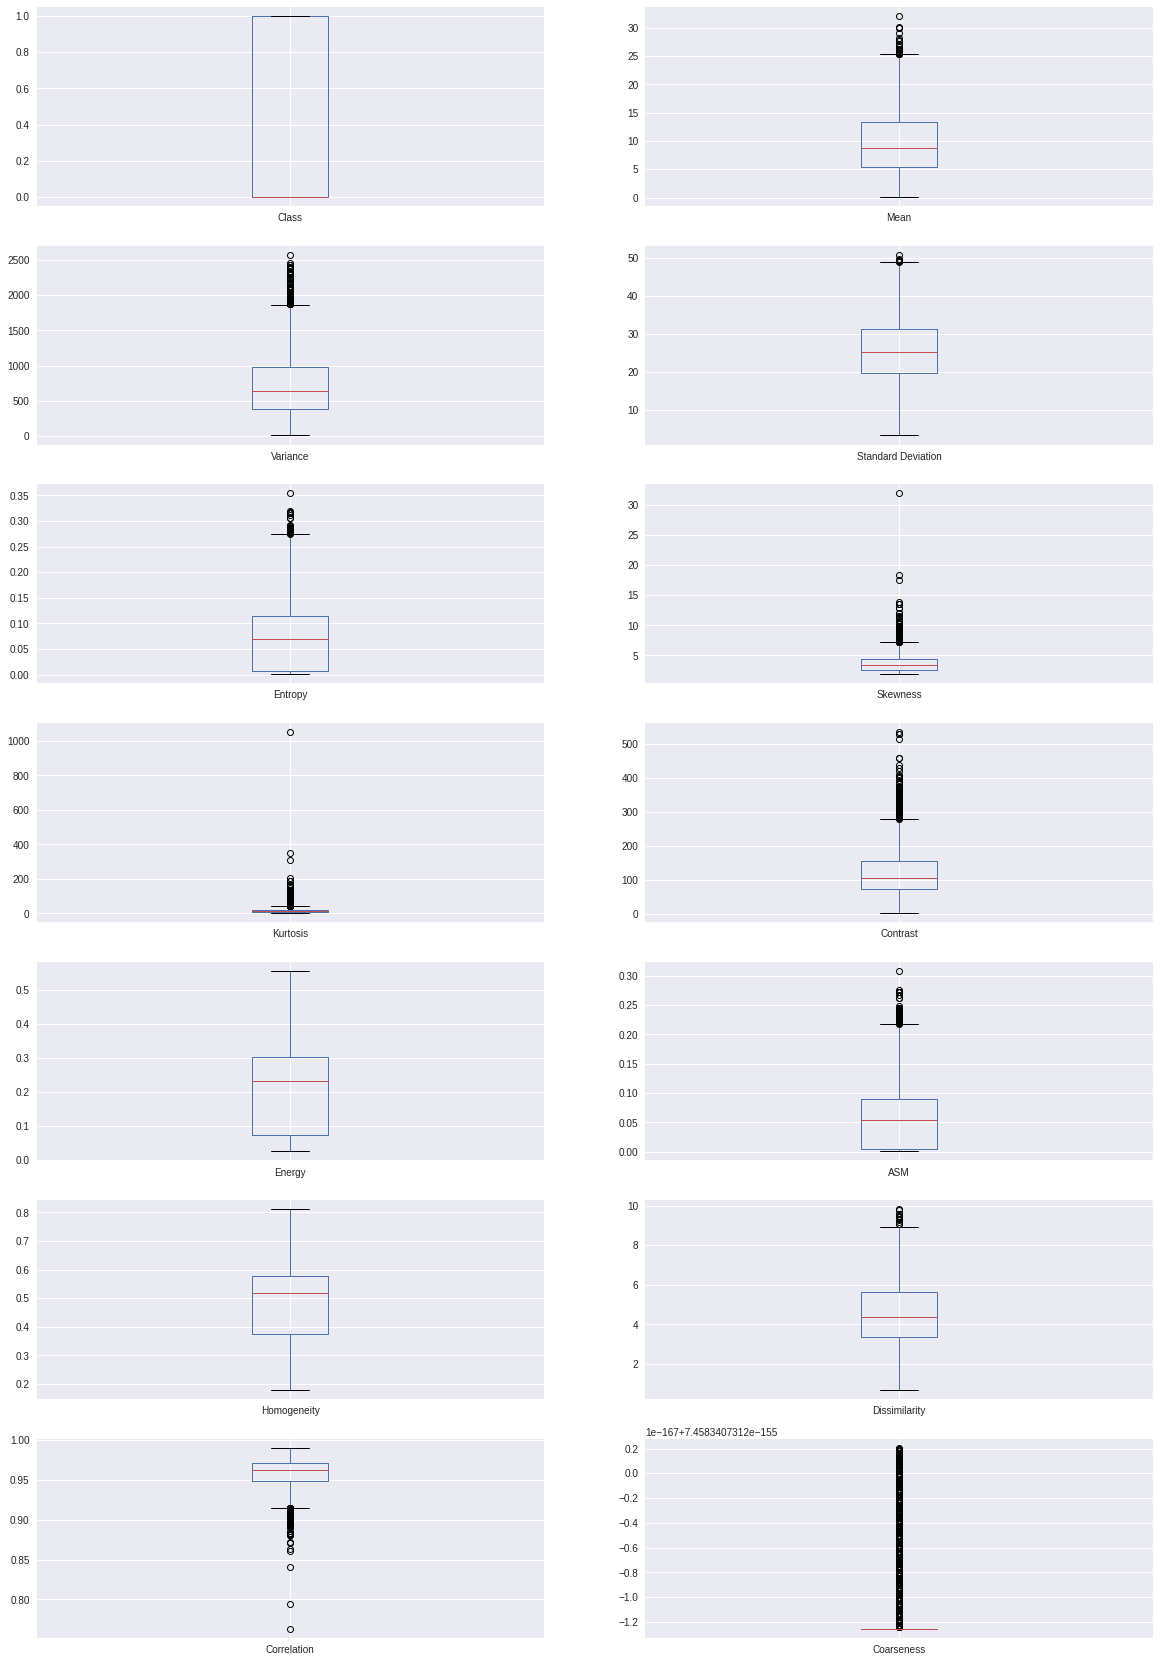

In [ ]:
x.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,30));

In [ ]:
y=x["Class"]
x = x.drop(["Class"],1)
# y = df["Class"]

In [ ]:
x.shape
y.shape

(3594,)

# **Scaling**

In [ ]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


x[scalable]=StandardScaler().fit_transform(x[scalable])
x

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,-0.586227,-0.231144,-0.079654,0.481488,0.297687,0.040113,-0.299907,0.657363,0.448196,0.361155,-0.045081,1.280418,-1.035053e-168
1,-0.178509,0.184614,0.338439,2.740113,-0.037434,-0.134180,-0.809629,2.070424,2.863945,1.332441,-0.855400,1.655349,-1.035053e-168
2,-0.437886,0.938299,0.987576,-1.061638,0.768997,0.337899,-0.545516,-1.375087,-1.022542,-1.757623,0.930228,1.067008,-1.035053e-168
3,-0.692490,0.527613,0.647996,-1.061490,1.138848,0.610943,0.471760,-1.374255,-1.022423,-1.954637,2.041744,0.315345,-1.035053e-168
4,-0.442647,0.014141,0.173564,1.022218,0.301735,0.047128,0.820212,1.050288,1.005232,0.120763,1.481673,0.782917,-1.035053e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,2.119925,1.083396,1.100923,-0.168007,-1.019361,-0.519911,0.577472,0.092497,-0.197778,0.007762,0.432336,-0.403302,1.345569e-167
3590,1.972797,1.124223,1.132263,-0.125133,-0.981821,-0.510689,0.617379,0.133435,-0.157100,0.133447,0.349180,-0.306665,1.345569e-167
3591,1.526565,0.955642,1.001291,-0.101709,-0.883556,-0.483285,0.704957,0.156751,-0.133503,0.049209,0.362482,-0.337549,1.345569e-167
3592,0.664765,0.496427,0.620928,0.177610,-0.628794,-0.397706,1.536272,0.410209,0.143083,-0.049244,1.226343,-0.951033,1.345569e-167


In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Class, dtype: int64

**Import Machine Learning Library.** 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.30,random_state=42)

In [ ]:
xtest

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2834,0.693101,2.927563,2.337831,-1.066662,0.029419,-0.102990,-0.652734,-1.406859,-1.026765,-1.447519,0.333299,1.005905,-1.035053e-168
315,-1.083491,-1.191865,-1.411950,0.577407,0.262380,0.022974,-1.239936,0.727946,0.541748,1.051405,-1.345529,1.079187,-1.035053e-168
3538,1.126585,1.904944,1.691924,-1.058314,-0.281924,-0.239775,0.509855,-1.355517,-1.019653,-1.613225,1.650422,0.690312,1.196521e-167
3541,1.297274,2.330944,1.971092,-1.045464,-0.355654,-0.272784,0.232694,-1.291612,-1.008692,-1.673154,1.440552,0.507622,1.204801e-167
439,-1.277269,-0.587662,-0.491929,-1.048124,2.635011,2.007848,-0.280728,-1.305140,-1.011207,-1.742093,1.256040,0.137147,-1.035053e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,-0.502702,0.324976,0.468405,-0.233919,0.483029,0.146092,2.933093,0.028380,-0.259561,-0.225117,0.599680,-0.211358,-1.035053e-168
1566,-1.241244,-0.643367,-0.562498,-1.050329,2.287231,1.649383,0.285618,-1.315523,-1.013067,-1.627672,1.663871,0.137609,-1.035053e-168
276,-0.845458,-0.896661,-0.912499,2.632097,0.078522,-0.080286,-0.867563,2.011841,2.741085,1.499813,-1.291666,1.007701,-1.035053e-168
2383,-0.973012,-0.631505,-0.547305,1.465491,0.799628,0.350442,3.436504,1.339057,1.470941,0.797871,1.268277,-1.108531,-1.035053e-168


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
pred1 = model.predict(xtest)
pred1

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
model.score(xtest,ytest)

0.989805375347544

# Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
pred2 = nb.predict(xtest)
pred2

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
nb.score(xtest,ytest)

0.9759036144578314

**K Nearest Neighbors Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
pred3 = knn.predict(xtest)
pred3

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
knn.score(xtest,ytest)

0.9860982391102873

**Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn import metrics

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
pred4 = rf.predict(xtest)
pred4

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
rf.score(xtest,ytest)

0.9870250231696015

In [ ]:
print("Accuracy:",metrics.accuracy_score(ytest, pred4))

Accuracy: 0.9870250231696015


In [ ]:
cnf_matrix = metrics.confusion_matrix(ytest, pred4)
cnf_matrix

array([[592,   1],
       [ 13, 473]])

Text(0.5, 257.44, 'Predicted label')

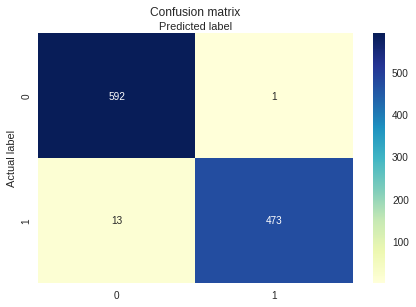

In [ ]:
cnf_matrix = metrics.confusion_matrix(ytest, pred4)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
spec = 474 / (474+2)

In [ ]:
spec

0.9957983193277311

In [ ]:
sen = 591 /(591+12)

In [ ]:
sen

0.9800995024875622

In [ ]:
NPV=474/(474+12)

In [ ]:
NPV

0.9753086419753086

In [ ]:
FPR=2/(2+475)

In [ ]:
FPR

0.0041928721174004195

In [ ]:
FNR=12/(12+591)

In [ ]:
FNR

0.01990049751243781

In [ ]:
import math
MCC = ((591*474) - (2*12)) / math.sqrt((591+2)*(591+12)*(474+2)*(474+12))

In [ ]:
MCC

0.9739148766627023

In [ ]:
print("F1:",metrics.f1_score(ytest, pred4))
print("Accuracy:",metrics.accuracy_score(ytest, pred4))
print("Precision:",metrics.precision_score(ytest, pred4))
print("Recall:",metrics.recall_score(ytest, pred4))

F1: 0.9854166666666667
Accuracy: 0.9870250231696015
Precision: 0.9978902953586498
Recall: 0.9732510288065843


**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(probability=True)

In [ ]:
sv.fit(xtrain,ytrain)

SVC(probability=True)

In [ ]:
pred5 = sv.predict(xtest)
pred5

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
sv.score(xtest,ytest)

0.9870250231696015

In [ ]:
print("F1:",metrics.f1_score(ytest, pred5))
print("Accuracy:",metrics.accuracy_score(ytest, pred5))
print("Precision:",metrics.precision_score(ytest, pred5))
print("Recall:",metrics.recall_score(ytest, pred5))

F1: 0.9855072463768116
Accuracy: 0.9870250231696015
Precision: 0.9916666666666667
Recall: 0.9794238683127572


**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
pred6 = dtc.predict(xtest)
pred6

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
dtc.score(xtest,ytest)

0.9823911028730306

**Gradient Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100)

In [ ]:
gb.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [ ]:
pred7 = gb.predict(xtest)

In [ ]:
gb.score(xtest,ytest)

0.9501345167351444

**AdaBoosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab = AdaBoostClassifier(n_estimators=50)

In [ ]:
ab.fit(xtrain,ytrain)

AdaBoostClassifier()

In [ ]:
pred8 = ab.predict(xtest)

In [ ]:
ab.score(xtest,ytest)

0.989805375347544

Text(0.5, 257.44, 'Predicted label')

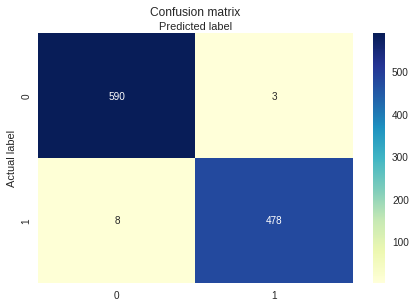

In [ ]:
cnf_matrix = metrics.confusion_matrix(ytest, pred8)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
spec = 478 / (478+3)

In [ ]:
spec

0.9937629937629938

In [ ]:
sen = 590 /(590+8)

In [ ]:
sen

0.9866220735785953

In [ ]:
NPV=478/(478+8)

In [ ]:
NPV

0.9835390946502057

In [ ]:
FPR=3/(3+478)

In [ ]:
FPR 

0.006237006237006237

In [ ]:
FNR=8/(8+590)

In [ ]:
FNR

0.013377926421404682

In [ ]:
import math
MCC = ((590*478) - (3*8)) / math.sqrt((590+3)*(590+8)*(478+3)*(478+8))

In [ ]:
MCC

0.97943210688318

In [ ]:
print("F1:",metrics.f1_score(ytest, pred8))
print("Accuracy:",metrics.accuracy_score(ytest, pred8))
print("Precision:",metrics.precision_score(ytest, pred8))
print("Recall:",metrics.recall_score(ytest, pred8))

F1: 0.9886246122026887
Accuracy: 0.989805375347544
Precision: 0.9937629937629938
Recall: 0.9835390946502057


#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()

In [ ]:
xg.fit(xtrain,ytrain)

XGBClassifier()

In [ ]:
pred9 = xg.predict(xtest)

In [ ]:
xg.score(xtest,ytest)

0.9925857275254866

Text(0.5, 257.44, 'Predicted label')

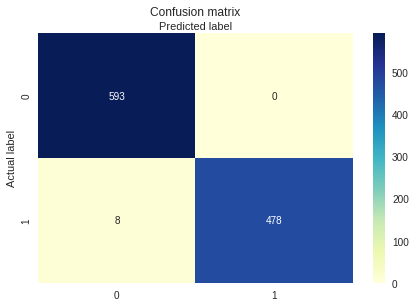

In [ ]:
cnf_matrix = metrics.confusion_matrix(ytest, pred9)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
spec = 478 / (478+0)

In [ ]:
spec

1.0

In [ ]:
sen = 593 /(593+8)

In [ ]:
sen

0.9866888519134775

In [ ]:
NPV=478/(478+8)

In [ ]:
NPV

0.9835390946502057

In [ ]:
FPR=0/(0+478)

In [ ]:
FPR

0.0

In [ ]:
FNR=8/(8+593)

In [ ]:
FNR

0.013311148086522463

In [ ]:
import math
MCC = ((593*478) - (0*8)) / math.sqrt((593+0)*(593+8)*(478+0)*(478+8))

In [ ]:
MCC

0.98511271442025

In [ ]:
print("F1:",metrics.f1_score(ytest, pred9))
print("Accuracy:",metrics.accuracy_score(ytest, pred9))
print("Precision:",metrics.precision_score(ytest, pred9))
print("Recall:",metrics.recall_score(ytest, pred9))

F1: 0.9917012448132779
Accuracy: 0.9925857275254866
Precision: 1.0
Recall: 0.9835390946502057


#Roc Curve


In [ ]:
pred_prob1 = rf.predict_proba(xtest)
pred_prob2 = ab.predict_proba(xtest)
pred_prob3 = xg.predict_proba(xtest)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ytest, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])
auc_score2 = roc_auc_score(ytest, pred_prob2[:,1])
auc_score3 = roc_auc_score(ytest, pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.9972796480197642 0.9986016558060777 0.998230383278163


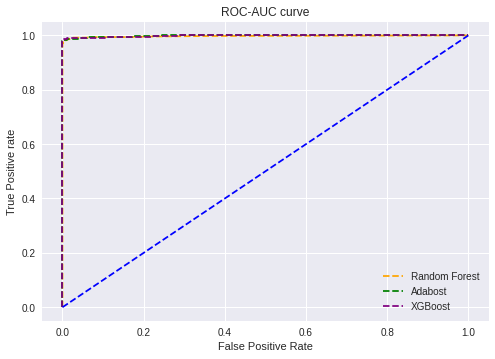

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Adabost')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC-AUC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Prec Curve

In [ ]:
pred_prob1 = rf.predict_proba(xtest)
pred_prob2 = ab.predict_proba(xtest)
pred_prob3 = xg.predict_proba(xtest)

In [ ]:
from sklearn.metrics import precision_recall_curve

# roc curve for models
fpr1, tpr1, thresh1 = precision_recall_curve(ytest, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = precision_recall_curve(ytest, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = precision_recall_curve(ytest, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

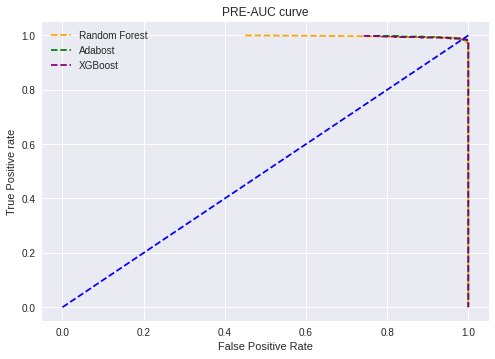

In [ ]:
# from sklearn.metrics import precision_recall_curve_score

# # auc scores
# auc_score1 = precision_recall_curve_score(ytest, pred_prob1[:,1])
# auc_score2 = precision_recall_curve_score(ytest, pred_prob2[:,1])
# auc_score3 = precision_recall_curve_score(ytest, pred_prob3[:,1])

# print(auc_score1, auc_score2,auc_score3)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Adabost')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('PRE-AUC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **LGBM**

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(xtrain,ytrain)

LGBMClassifier()

In [ ]:
pred10 = lgb.predict(xtest)

In [ ]:
lgb.score(xtest,ytest)

0.989805375347544

In [ ]:
print("F1:",metrics.f1_score(ytest, pred10))
print("Accuracy:",metrics.accuracy_score(ytest, pred10))
print("Precision:",metrics.precision_score(ytest, pred10))
print("Recall:",metrics.recall_score(ytest, pred10))

F1: 0.9885773624091381
Accuracy: 0.989805375347544
Precision: 0.9979035639412998
Recall: 0.9794238683127572


In [ ]:
report = [["RF", 0.987, 0.997, 0.975, 0.986], ["SVM", 0.987, 0.991, 0.979, 0.985], 
          ["ADB", 0.989, 0.993, 0.983, 0.9898],["LGBM", 0.989, 0.997, 0.979, 0.988],
          ["XGB", 0.992, 1.000, 0.983, 0.992]]
overall_result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-score
4,XGB,0.992,1.000,0.983,0.9920
2,ADB,0.989,0.993,0.983,0.9898
3,LGBM,0.989,0.997,0.979,0.9880
0,RF,0.987,0.997,0.975,0.9860
1,SVM,0.987,0.991,0.979,0.9850


# Graphical interface

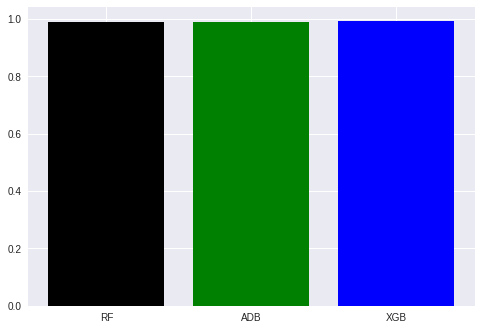

In [ ]:
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_axes([0,0,1,1])
# langs = ['RF', 'ADB', 'XGB']
# students = [0.987,0.989,0.992]
# ax.bar(langs,students)
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [0.987,0.989,0.992]
bars = ('RF','ADB','XGB')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'green', 'blue'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph  
plt.show()


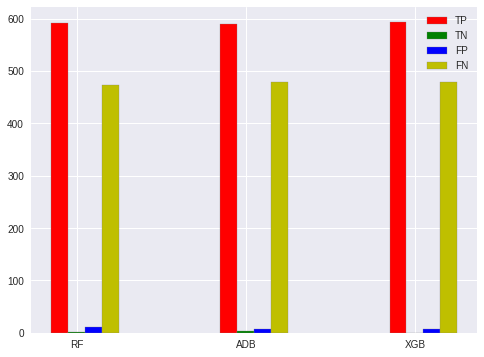

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(8, 6))

# set height of bar
IT = [591, 590, 593]
ECE = [2,3, 0]
CSE = [12, 8, 8]
AD = [474, 478, 478]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='TP')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='TN')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='FP')
plt.bar(br4, AD, color ='y', width = barWidth,
		edgecolor ='grey', label ='FN')

# Adding Xticks
# plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		['RF', 'ADB', 'XGB'])

plt.legend()
plt.show()


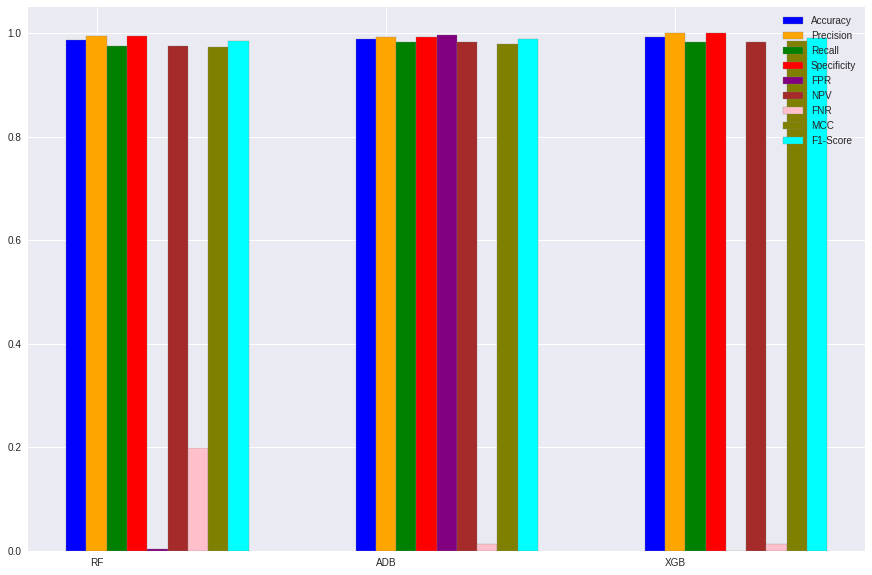

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.07
fig = plt.subplots(figsize =(15, 10))

# set height of bar
IT = [0.987, 0.989, 0.992]
ECE = [0.995,0.993, 1.00]
CSE = [0.975, 0.983, 0.983]
spec = [0.995, 0.993, 1.000]
sen = [0.004, 0.996, 0.000]
npv = [0.975, 0.983, 0.983]
fnr = [0.199, 0.013, 0.013]
mcc = [0.973, 0.979, 0.985]
f1 = [0.985, 0.988, 0.991]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]

# Make the plot
plt.bar(br1, IT, color ='blue', width = barWidth,
		edgecolor ='grey', label ='Accuracy')
plt.bar(br2, ECE, color ='orange', width = barWidth,
		edgecolor ='grey', label ='Precision')
plt.bar(br3, CSE, color ='green', width = barWidth,
		edgecolor ='grey', label ='Recall')
plt.bar(br4, spec, color ='red', width = barWidth,
		edgecolor ='grey', label ='Specificity')
plt.bar(br5, sen, color ='purple', width = barWidth,
		edgecolor ='grey', label ='FPR')
plt.bar(br6, npv, color ='brown', width = barWidth,
		edgecolor ='grey', label ='NPV')
plt.bar(br7, fnr, color ='pink', width = barWidth,
		edgecolor ='grey', label ='FNR')
plt.bar(br8, mcc, color ='olive', width = barWidth,
		edgecolor ='grey', label ='MCC')
plt.bar(br9, f1, color ='cyan', width = barWidth,
		edgecolor ='grey', label ='F1-Score')

# Adding Xticks
# plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		['RF', 'ADB', 'XGB'])

plt.legend()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
  
# data = {'Quantity': [320,450,300,120,280],
#         'Price': [800,250,1200,150,300],
#         'Product':[800,250,1200,150,300],
#         'height':[800,250,1200,150,300]
#        }
# df = pd.DataFrame(data,columns=['Quantity','Price','Product','height'], index = ['Computer','Monitor','Laptop','Printer','Tablet'])

# plt.style.use('ggplot')

# df.plot.barh()

# plt.title('Store Inventory')
# plt.ylabel('Product')
# plt.xlabel('Quantity')
# plt.show()

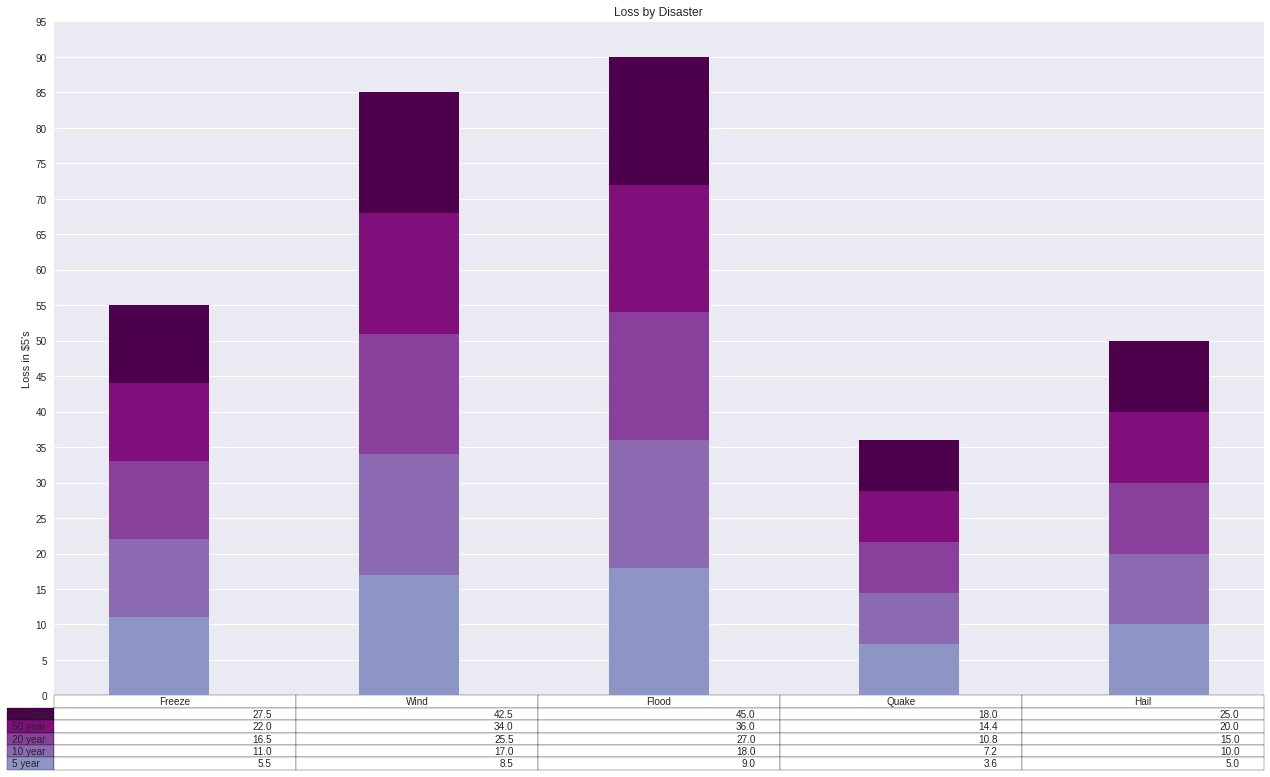

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))

data = [[ 55,85,90,36,50],
        [ 55,85,90,36,50],
        [ 55,85,90,36,50],
        [ 55,85,90,36,50],
        [ 55,85,90,36,50]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 100, 5)
value_increment = 5

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.5, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 10.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.1)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [ ]:
#external test data

XTest = x[3262:]
YTest = y[3262:]

x = x[:3262]
y = y[:3262]

**Gradient Boost**

In [ ]:
"""
params = { 
    "n_estimators": [20,50,100],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.1, 0.05, 0.01, 0.005],
    "subsample" : [0.6,0.8,1.0] 
}

gradientBoost = GradientBoostingClassifier()

gridSCV = GridSearchCV(gradientBoost,params,cv=10)
gridSCV.fit(x,y.values.ravel())
best_gb = gridSCV.best_estimator_

gridSCV.best_params_
"""

'\nparams = { \n    "n_estimators": [20,50,100],\n    "max_depth" : [3,5,7],\n    "learning_rate" : [0.1, 0.05, 0.01, 0.005],\n    "subsample" : [0.6,0.8,1.0] \n}\n\ngradientBoost = GradientBoostingClassifier()\n\ngridSCV = GridSearchCV(gradientBoost,params,cv=10)\ngridSCV.fit(x,y.values.ravel())\nbest_gb = gridSCV.best_estimator_\n\ngridSCV.best_params_\n'

In [ ]:
# best_gb.fit(x.values,y.values.ravel())
# gboostPred = cross_val_predict(best_gb, X=x, y=y.values.ravel(), cv=10)
# sns.heatmap(confusion_matrix(y.values.ravel(),gboostPred), annot=True,fmt="d")
# plt.show()
# print(accuracy_score(y.values.ravel(),gboostPred))

In [ ]:
# gboostPredTest = cross_val_predict(best_gb, X=XTest, y=YTest.values.ravel(), cv=10)
# sns.heatmap(confusion_matrix(YTest.values.ravel(),gboostPredTest), annot=True,fmt="d")
# plt.show()
# print(accuracy_score(YTest.values.ravel(),gboostPredTest))

**XGBoost**

In [ ]:
#XGBoost
"""
params = {
    "min_child_weight" : [0.1, 0.2, 0.5],
    "max_depth" : [2, 4, 6, 8],
    "subsample" : [0.1, 0.2, 0.5, 1],
    "n_estimators" : range(50,450,50),
    "learning_rate" : [0.1, 0.05, 0.01]    
}

xgboost = XGBClassifier()
gridSCV = GridSearchCV(xgboost,params,cv=10)
gridSCV.fit(x.values,y.values.ravel())
best_xgboost = gridSCV.best_estimator_
gridSCV.best_params_
"""

'\nparams = {\n    "min_child_weight" : [0.1, 0.2, 0.5],\n    "max_depth" : [2, 4, 6, 8],\n    "subsample" : [0.1, 0.2, 0.5, 1],\n    "n_estimators" : range(50,450,50),\n    "learning_rate" : [0.1, 0.05, 0.01]    \n}\n\nxgboost = XGBClassifier()\ngridSCV = GridSearchCV(xgboost,params,cv=10)\ngridSCV.fit(x.values,y.values.ravel())\nbest_xgboost = gridSCV.best_estimator_\ngridSCV.best_params_\n'

In [ ]:
# #best_xgboost = XGBClassifier(min_child_weight=0.4,max_depth=8,subsample=0.5,n_estimators=250,learning_rate=0.05)
# best_xgboost.fit(x.values,y.values.ravel())
# xgboostPred = cross_val_predict(best_xgboost, X=x, y=y.values.ravel(), cv=10)
# sns.heatmap(confusion_matrix(y.values.ravel(),xgboostPred), annot=True,fmt="d")
# plt.show()
# print(accuracy_score(y.values.ravel(),xgboostPred))